In [15]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
library= pd.read_csv("input\library.csv")
cases=pd.read_csv('input\cases.csv')

In [17]:
library.columns

Index(['Outlook', ' Temperature', ' Humidity', ' Windy', ' Play'], dtype='object')

In [18]:
cases.columns

Index(['Outlook', ' Temperature', ' Humidity', ' Windy'], dtype='object')

In [19]:
library

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [20]:
cases

,Outlook,Temperature,Humidity,Windy
0,Sunny,Mild,Normal,False
1,Rainy,Cool,Normal,False
2,Overcast,Cool,High,False
3,Sunny,Cool,High,True
4,Rainy,Hot,High,True
5,Rainy,Cool,High,True


# Retrieve
Tahap retrieve merupakan tahapan mencari solusi dari kasus lama yang relevan dengan kasus baru. Nilai kesamaan antara kasus lama dengan kasus baru akan dicari pada tahap ini.Terdapat beberapa metode retrieve yang bisa digunakan, yaitu nearest neighbor similarity, hamming distance similarity,  euclidean distance similarity, dan minkowski distance similarity,Penelitian ini menggunakan metode Mahalanobis distance untuk  menemukan solusi kasus lama yang relevan dengan kasus baru

### Indexing (One hot encoder)

In [21]:
# Pilih column dari library yang digunakan sebagai base cases, kecuali sebuah solusi
base = library.iloc[:, range(library.shape[1] - 1)]      # Exclude last column

# Initial One-hot encoding
base = pd.get_dummies(base)
problems = pd.get_dummies(cases)

In [22]:
base

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Windy_ False,Windy_ True
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [23]:
problems

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Windy_ False,Windy_ True
0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,1,0,1,0
3,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1,0,0,1
5,0,1,0,1,0,0,1,0,0,1


## Similarity Base-Problem (Retrieve)

In [24]:
# Iterasi ke semua problem cases
for i in range(problems.shape[0]):
    # Inverse covariance matrix untuk base cases
    covariance_matrix = base.cov()                                      # Covariance
    inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse
    # Get case row untuk evaluate 
    case_row = problems.loc[i, :].values
    #  array Distance kosong untuk menyimpan mahalanobis distances obrained comparing each libary case
    distances = np.zeros(base.shape[0])
    # Iterasi untuk setiap base cases row
    for j in range(base.shape[0]):
        # Get base case row
        base_row = base.loc[j, :].values

        # Calculate mahalanobis distance between case row and base cases, and store it
        distances[j] = distance.mahalanobis(case_row, base_row, inverse_covariance_matrix)
retrieve=pd.Series(distances)
retrieve

0     542.411801
1     550.423665
2     527.946309
3     483.837784
4     390.766154
5     320.076022
6     483.856947
7     609.825948
8     537.087398
9     625.252113
10    682.465605
11    600.337680
12    682.324309
13    371.224109
dtype: float64

# Reuse

In [25]:
value = pd.Series(distances<distances.mean() * 0.8)
index = value.loc[value==True].index
reuse = base.iloc[index,:]
reuse

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Windy_ False,Windy_ True
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
13,0,1,0,0,0,1,1,0,0,1


# Revise
- Empety = True => KNN
- Empety = False => CBR

In [26]:
if reuse.empty:
    print("KNN")
    from sklearn.neighbors import KNeighborsClassifier
    X_train = base      # Exclude last column
    y_train = library.iloc[:,-1]
    X_test = problems
    covariance_matrix = X_train.cov()                                      # Covariance
    inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse

    model = KNeighborsClassifier(metric='mahalanobis',metric_params={"V":inverse_covariance_matrix})
    model.fit(X_train, y_train)
    y_test = pd.Series(model.predict(X_test))
    cases[" Play"] = y_test
    library = library.append(cases, ignore_index = True)     # Append to library
else:
    print("CBR")
    # Move through all problem cases
    for i in range(problems.shape[0]):
        # Get inverse covariance matrix for the base cases
        covariance_matrix = base.cov()                                      # Covariance
        inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse

        # Get case row to evaluate
        case_row = problems.loc[i, :]

        # Empty distances array to store mahalanobis distances obtained comparing each library cases
        distances_revise = np.zeros(base.shape[0])

        # For each base cases rows
        for j in range(reuse.shape[0]):
            # Get base case row
            base_row = base.loc[j, :]

            # Calculate mahalanobis distance between case row and base cases, and store it
            distances_revise[j] = distance.mahalanobis(case_row, base_row, inverse_covariance_matrix)

        # Returns the index (row) of the minimum value in distances calculated
        min_distance_row = np.argmin(distances_revise)

        # Get solution based on index of found minimum distance, and append it to main library
        # From cases, append library 'similar' solution
        case = np.append(cases.iloc[i, :], library.iloc[min_distance_row, -1])

        # Store
        # Get as operable pandas Series
        case = pd.Series(case, index = library.columns)         # Case with Solution
        library = library.append(case, ignore_index = True)     # Append to library

        # Save 'covariance heat map (biased)' output as file
        sn.heatmap(np.cov(base, bias = True), annot = True, fmt = 'g')
        plt.gcf().set_size_inches(12, 6)
        plt.title(f'Covariance Heat map #{i} \n Library cases stored {j} - Base to solve problem {i}')
        plt.savefig(f'output/covariance_heat_map_{i}.png', bbox_inches='tight')
        plt.close()
    

CBR


C:\Users\User\AppData\Local\Temp\ipykernel_16360\1165899174.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  library = library.append(case, ignore_index = True)     # Append to library
C:\Users\User\AppData\Local\Temp\ipykernel_16360\1165899174.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  library = library.append(case, ignore_index = True)     # Append to library
C:\Users\User\AppData\Local\Temp\ipykernel_16360\1165899174.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  library = library.append(case, ignore_index = True)     # Append to library
C:\Users\User\AppData\Local\Temp\ipykernel_16360\1165899174.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [29]:
case

Outlook         Rainy
 Temperature     Cool
 Humidity        High
 Windy           True
 Play             Yes
dtype: object

# Retain

In [27]:
library.tail(problems.shape[0])

,Outlook,Temperature,Humidity,Windy,Play
14,Sunny,Mild,Normal,False,Yes
15,Rainy,Cool,Normal,False,Yes
16,Overcast,Cool,High,False,Yes
17,Sunny,Cool,High,True,Yes
18,Rainy,Hot,High,True,Yes
19,Rainy,Cool,High,True,Yes


In [28]:
library

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


### Test prediction with CBR

In [30]:
# Pilih column dari library yang digunakan sebagai base cases, kecuali sebuah solusi
base = library.iloc[:, range(library.shape[1] - 1)]      # Exclude last column

# Initial One-hot encoding
base = pd.get_dummies(base)
problems = pd.get_dummies(base)

In [32]:
# Iterasi ke semua problem cases
for i in range(problems.shape[0]):
    # Inverse covariance matrix untuk base cases
    covariance_matrix = base.cov()                                      # Covariance
    inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse
    # Get case row untuk evaluate 
    case_row = problems.loc[i, :].values
    #  array Distance kosong untuk menyimpan mahalanobis distances obrained comparing each libary case
    distances = np.zeros(base.shape[0])
    # Iterasi untuk setiap base cases row
    for j in range(base.shape[0]):
        # Get base case row
        base_row = base.loc[j, :].values

        # Calculate mahalanobis distance between case row and base cases, and store it
        distances[j] = distance.mahalanobis(case_row, base_row, inverse_covariance_matrix)
retrieve=pd.Series(distances)
retrieve

0     578.043119
1     539.575345
2     547.046074
3     435.860671
4     324.816987
5     273.459681
6     486.558027
7     532.852137
8     477.572151
9     476.754129
10    541.867908
11    582.272013
12    641.664559
13    357.734845
14    564.251948
15    324.816987
16    457.295205
17    355.382060
18    413.920722
19      0.000000
dtype: float64

In [41]:
value = pd.Series(distances<distances.mean() * 0.8)
index = value.loc[value==True].index
reuse = base.iloc[index,:]
reuse

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Windy_ False,Windy_ True
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
15,0,1,0,1,0,0,0,1,1,0
17,0,0,1,1,0,0,1,0,0,1
19,0,1,0,1,0,0,1,0,0,1


In [ ]:
if reuse.empty:
    print("KNN")
    from sklearn.neighbors import KNeighborsClassifier
    X_train = base      # Exclude last column
    y_train = library.iloc[:,-1]
    X_test = problems
    covariance_matrix = X_train.cov()                                      # Covariance
    inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse

    model = KNeighborsClassifier(metric='mahalanobis',metric_params={"V":inverse_covariance_matrix})
    model.fit(X_train, y_train)
    y_test = pd.Series(model.predict(X_test))
    cases[" Play"] = y_test
    library = library.append(cases, ignore_index = True)     # Append to library
else:
    print("CBR")
    # Move through all problem cases
    for i in range(problems.shape[0]):
        # Get inverse covariance matrix for the base cases
        covariance_matrix = base.cov()                                      # Covariance
        inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse

        # Get case row to evaluate
        case_row = problems.loc[i, :]

        # Empty distances array to store mahalanobis distances obtained comparing each library cases
        distances_revise = np.zeros(base.shape[0])

        # For each base cases rows
        for j in range(reuse.shape[0]):
            # Get base case row
            base_row = base.loc[j, :]

            # Calculate mahalanobis distance between case row and base cases, and store it
            distances_revise[j] = distance.mahalanobis(case_row, base_row, inverse_covariance_matrix)

        # Returns the index (row) of the minimum value in distances calculated
        min_distance_row = np.argmin(distances_revise)

        # Get solution based on index of found minimum distance, and append it to main library
        # From cases, append library 'similar' solution
        case = np.append(cases.iloc[i, :], library.iloc[min_distance_row, -1])

        # Store
        # Get as operable pandas Series
        case = pd.Series(case, index = library.columns)         # Case with Solution
        library2 = library.append(case, ignore_index = True)     # Append to library

        # # Save 'covariance heat map (biased)' output as file
        # sn.heatmap(np.cov(base, bias = True), annot = True, fmt = 'g')
        # plt.gcf().set_size_inches(12, 6)
        # plt.title(f'Covariance Heat map #{i} \n Library cases stored {j} - Base to solve problem {i}')
        # plt.savefig(f'output/covariance_heat_map_{i}.png', bbox_inches='tight')
        # plt.close()


In [63]:
library2 = library2[:]
y_true = library[" Play"]
y_pred = library2[" Play"][:-1]

In [64]:
y_true

0       No
1       No
2      Yes
3      Yes
4      Yes
5       No
6      Yes
7       No
8      Yes
9      Yes
10     Yes
11     Yes
12     Yes
13      No
14     Yes
15     Yes
16     Yes
17     Yes
18     Yes
19     Yes
Name:  Play, dtype: object

In [65]:
y_pred

0       No
1       No
2      Yes
3      Yes
4      Yes
5       No
6      Yes
7       No
8      Yes
9      Yes
10     Yes
11     Yes
12     Yes
13      No
14     Yes
15     Yes
16     Yes
17     Yes
18     Yes
19      No
Name:  Play, dtype: object

In [86]:
from sklearn.metrics import accuracy_score
cbr_test =accuracy_score(y_true,y_pred)
cbr_test

0.95

### Test prediction with KNN


In [69]:
# Pilih column dari library yang digunakan sebagai base cases, kecuali sebuah solusi
base = library.iloc[:, range(library.shape[1] - 1)]      # Exclude last column

# Initial One-hot encoding
base = pd.get_dummies(base)
problems = pd.get_dummies(cases)

In [72]:
X_test

,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Windy_ False,Windy_ True
0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,1,0,1,0
3,0,0,1,1,0,0,1,0,0,1
4,0,1,0,0,1,0,1,0,0,1
5,0,1,0,1,0,0,1,0,0,1


In [90]:
from sklearn.neighbors import KNeighborsClassifier
X_train = base      # Exclude last column
y_train = library.iloc[:,-1]
X_test = problems
covariance_matrix = X_train.cov()                                      # Covariance
inverse_covariance_matrix = np.linalg.pinv(covariance_matrix)       # Inverse
model = KNeighborsClassifier()
# model = KNeighborsClassifier(metric='mahalanobis',metric_params={'V':inverse_covariance_matrix})
model.fit(X_train, y_train)
y_test = pd.Series(model.predict(X_train))
cases[" Play"] = y_test
library3 = library.append(cases, ignore_index = True)     # Append to library

C:\Users\User\AppData\Local\Temp\ipykernel_16360\2512440622.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  library3 = library.append(cases, ignore_index = True)     # Append to library


In [91]:
knn_test = accuracy_score(y_train,y_test)
knn_test

0.85

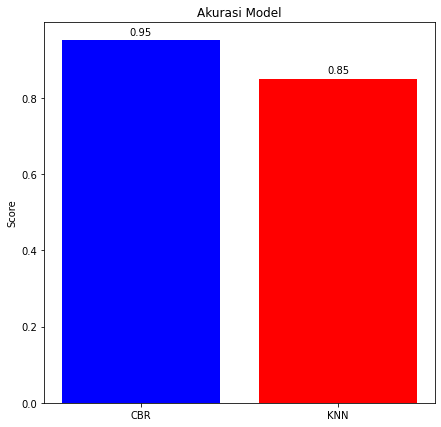

In [116]:
visualisai = pd.DataFrame({"CBR":[cbr_test], "KNN":[knn_test]}).T
# visualisai
plt.figure(figsize=(7,7))
colors = ["#0000FF",'#FF0000']
croods = np.arange(len(visualisai))
plt.ylabel('Score')
plt.title("Akurasi Model")
reacts=plt.bar(croods,visualisai[0],tick_label=["CBR","KNN"],color=colors)
plt.bar_label(reacts,padding=3)
plt.show()